In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [2]:
path='/mnt/is2/fstasys/ITV/base09/out/'
s0=pynbody.load(path+'snapshot_008')

In [3]:
mdm=s0['mass']

In [4]:
t=np.loadtxt('/mnt/is2/fstasys/ITV/base09/rockstar/out_0.list',skiprows=16)

In [22]:
cut, = np.where (t[:,7]>=15)

In [13]:
halos=len(t[cut,7])
print('cantidad de halos de interes:',halos)

cantidad de halos de interes: 491338


In [14]:
dh=halos/(500**3)

In [15]:
ddm=(3*(100**2)*(0.276))/(8*np.pi*(4.3e-9))
mp=ddm*(500**3)/(512**3)/1e10
print('masa de particula:',mp)
print('menor masa de halo:',mp*20)

masa de particula: 7.135462886550386
menor masa de halo: 142.70925773100774


In [16]:
tr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop_R.dat')
ts=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop_S.dat')
masa_dm=0.09328805
masa_gs=0.018172996

In [17]:
mp*20*(1-masa_gs/masa_dm)/masa_dm

1231.7628477656924

In [41]:
142*0.82

116.44

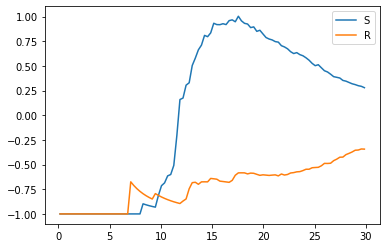

In [37]:
t1=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_S.dat')
t2=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_R.dat')
plt.plot(t1[:,0],(t1[:,1]/t1[:,2]-dh)/dh,label='S')
plt.plot(t2[:,0],(t2[:,1]/t2[:,2]-dh)/dh,label='R')
plt.legend()
#plt.xlim(9,14)
#plt.ylim(-1,-0.6)

In [38]:
(t2[:,1]/t2[:,2]-dh)/dh

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -0.67466108, -0.71215615,
       -0.74410389, -0.77149352, -0.7951097 , -0.81558047, -0.8334126 ,
       -0.84901791, -0.79410005, -0.81225493, -0.82833674, -0.84263298,
       -0.85538484, -0.86679538, -0.87703634, -0.88625384, -0.89457263,
       -0.86946614, -0.84821131, -0.7454009 , -0.68315625, -0.67912938,
       -0.69960263, -0.675043  , -0.67459331, -0.67499297, -0.64012327,
       -0.64392271, -0.64807525, -0.66762085, -0.67146098, -0.6755372 ,
       -0.67980164, -0.65992242, -0.60804083, -0.58382619, -0.58346194,
       -0.58379311, -0.59417006, -0.58620238, -0.58813567, -0.59866228,
       -0.60880508, -0.60362389, -0.60654709, -0.60971188, -0.60

In [40]:
t2[:,0]

array([ 0.150995  ,  0.45098499,  0.75097495,  1.05096507,  1.35095501,
        1.65094507,  1.95093501,  2.25092483,  2.550915  ,  2.85090494,
        3.15089488,  3.45088482,  3.750875  ,  4.0508647 ,  4.35085487,
        4.65084505,  4.95083475,  5.25082493,  5.55081511,  5.85080481,
        6.15079498,  6.45078468,  6.75077486,  7.05076504,  7.35075474,
        7.65074492,  7.95073509,  8.25072575,  8.55071545,  8.85070515,
        9.1506958 ,  9.4506855 ,  9.7506752 , 10.0506649 , 10.3506556 ,
       10.6506453 , 10.950635  , 11.2506256 , 11.5506153 , 11.850605  ,
       12.1505957 , 12.4505854 , 12.7505751 , 13.0505657 , 13.3505554 ,
       13.6505451 , 13.9505358 , 14.2505255 , 14.5505152 , 14.8505049 ,
       15.1504955 , 15.4504852 , 15.7504749 , 16.0504646 , 16.3504543 ,
       16.650444  , 16.9504337 , 17.2504234 , 17.550415  , 17.8504047 ,
       18.1503944 , 18.4503841 , 18.7503738 , 19.0503635 , 19.3503551 ,
       19.6503448 , 19.9503345 , 20.2503242 , 20.5503139 , 20.85

In [18]:
t1=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_S760.dat')
t2=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_S615.dat')

t3=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_R760.dat')
t4=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_R615.dat')

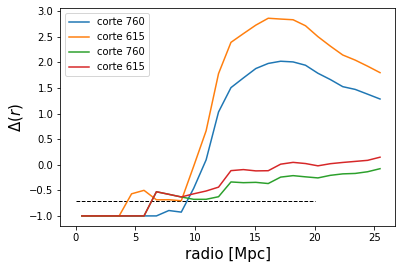

In [19]:
plt.plot(t1[:,0],(t1[:,1]/t1[:,2]-dh)/dh,label='corte 760')
plt.plot(t2[:,0],(t2[:,1]/t2[:,2]-dh)/dh,label='corte 615')
plt.plot(t3[:,0],(t3[:,1]/t3[:,2]-dh)/dh,label='corte 760')
plt.plot(t4[:,0],(t4[:,1]/t4[:,2]-dh)/dh,label='corte 615')

plt.hlines(y=-0.7, xmin=0,xmax=20,ls='--',lw=1)
plt.xlabel('radio [Mpc]',size=15)
plt.ylabel('$ \Delta(r) $',size=15)
plt.legend()
#plt.ylim(-1,-0.5)
#plt.xlim(9.5,13)

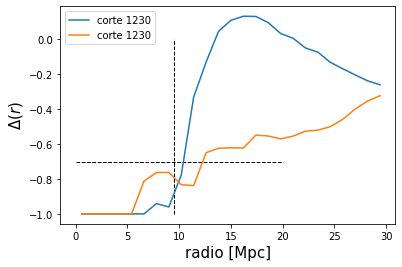

In [38]:
t1=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_S1230.dat')
t2=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_R1230.dat')
plt.plot(t1[:,0],(t1[:,1]/t1[:,2]-dh)/dh,label='corte 1230')
plt.plot(t2[:,0],(t2[:,1]/t2[:,2]-dh)/dh,label='corte 1230')


plt.hlines(y=-0.7, xmin=0,xmax=20,ls='--',lw=1)
plt.vlines(x=9.5, ymin=-1,ymax=0,ls='--',lw=1)

plt.xlabel('radio [Mpc]',size=15)
plt.ylabel('$ \Delta(r) $',size=15)
plt.legend()
#plt.ylim(-1,-0.5)
#plt.xlim(9.5,11)